In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# test_data.apply(lambda x: sum(x.isnull()))

In [6]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [7]:
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [8]:
train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 

In [9]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


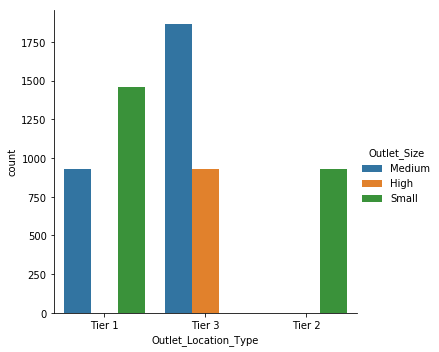

In [10]:
sns.factorplot('Outlet_Location_Type',data = train_data,hue ='Outlet_Size' ,kind='count')

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


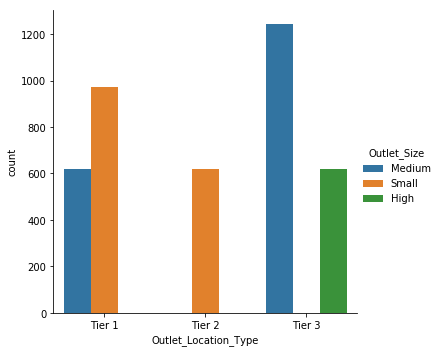

In [11]:
sns.factorplot('Outlet_Location_Type',data = test_data,hue ='Outlet_Size' ,kind='count')

In [12]:
#sns.factorplot('Outlet_Type','num_years',data = test_data,hue='Outlet_Size' )

In [13]:
#sns.factorplot('Outlet_Type','num_years',data = train_data,hue='Outlet_Size' )

In [14]:
full_data = [train_data, test_data]

In [15]:
# filling null values
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)    

In [16]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [17]:
# handling catagorical variables
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)
train_datar

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,num_years,Item_Fat_Content_Regular,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300000,0.016047,249.8092,OUT049,1999,3735.1380,14,0,0,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.920000,0.019278,48.2692,OUT018,2009,443.4228,4,1,0,...,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.500000,0.016760,141.6180,OUT049,1999,2097.2700,14,0,0,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.200000,0.000000,182.0950,OUT010,1998,732.3800,15,1,0,...,0,0,0,1,0,0,1,0,0,0
4,NCD19,8.930000,0.000000,53.8614,OUT013,1987,994.7052,26,0,0,...,0,0,0,0,0,0,1,1,0,0
5,FDP36,10.395000,0.000000,51.4008,OUT018,2009,556.6088,4,1,0,...,0,0,0,1,0,0,1,0,1,0
6,FDO10,13.650000,0.012741,57.6588,OUT013,1987,343.5528,26,1,0,...,1,0,0,0,0,0,1,1,0,0
7,FDP10,12.857645,0.127470,107.7622,OUT027,1985,4022.7636,28,0,0,...,1,0,0,1,0,0,1,0,0,1
8,FDH17,16.200000,0.016687,96.9726,OUT045,2002,1076.5986,11,1,0,...,0,0,0,1,0,1,0,1,0,0
9,FDU28,19.200000,0.094450,187.8214,OUT017,2007,4710.5350,6,1,0,...,0,0,0,1,0,1,0,1,0,0


In [18]:
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'num_years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [19]:
X = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)


In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))


In [23]:
predictions = regressor.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)*0.1
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 85.24 degrees.
Accuracy: 89.83 %.
Root Mean Squared Error: 1132.154574390424


In [24]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
predictions = reg.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)*0.1
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 132.55 degrees.
Accuracy: 82.16 %.
Root Mean Squared Error: 1746.8410384884066


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [27]:
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)*0.1
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 81.25 degrees.
Accuracy: 93.96 %.
Root Mean Squared Error: 1138.418011688573


In [28]:
X_t = test_datar[feat_cols]
y_result = regressor.predict(X_t)

In [29]:
y_result

array([1815.02913421, 1550.03990924, 1919.56810626, ..., 1837.32333838,
       3667.47797899, 1321.20829395])

In [30]:
result = pd.DataFrame()
result['Item_Identifier'] = test_datar['Item_Identifier']
result['Outlet_Identifier'] = test_datar['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
print("              Linear Regression")
result.head()


              Linear Regression


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1815.029134
1,FDW14,OUT017,1550.039909
2,NCN55,OUT010,1919.568106
3,FDQ58,OUT017,2670.862393
4,FDY38,OUT027,5078.186880


In [31]:
X_t = test_datar[feat_cols]
y_result = reg.predict(X_t)

In [32]:
y_result

array([1775.65054323, 1756.50697326, 1797.09552926, ..., 1784.69888337,
       1804.04969005, 1752.07235629])

In [33]:
result = pd.DataFrame()
result['Item_Identifier'] = test_datar['Item_Identifier']
result['Outlet_Identifier'] = test_datar['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
print("         Support Vector Regression")
result.head()


         Support Vector Regression


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1775.650543
1,FDW14,OUT017,1756.506973
2,NCN55,OUT010,1797.095529
3,FDQ58,OUT017,1806.086052
4,FDY38,OUT027,1797.390044


In [37]:
X_t = test_datar[feat_cols]
y_result = rf.predict(X_t)

In [38]:
y_result

array([1661.5019026, 1327.5659178,  624.8260022, ..., 1944.1373316,
       5097.6364464, 1646.2557484])

In [39]:
result = pd.DataFrame()
result['Item_Identifier'] = test_datar['Item_Identifier']
result['Outlet_Identifier'] = test_datar['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
print("         Random Forest Regressor")
result.head()


         Random Forest Regressor


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1661.501903
1,FDW14,OUT017,1327.565918
2,NCN55,OUT010,624.826002
3,FDQ58,OUT017,1487.033007
4,FDY38,OUT027,6574.635848


In [34]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [47]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(, dataset.target)
# summarize the selection of the attributes
#print(dataset)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
